In [1]:
import pandas as pd
from distill_bert import DistillBert
from classifier import SentimentClassifier
from pathlib import Path

import warnings

warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('emobank.csv')

In [3]:
df.head()

,id,split,V,A,D,text
0,110CYL068_1036_1079,train,3.00,3.00,3.20,"Remember what she said in my last letter? """
1,110CYL068_1079_1110,test,2.80,3.10,2.80,If I wasn't working here.
2,110CYL068_1127_1130,train,3.00,3.00,3.00,".."""
3,110CYL068_1137_1188,train,3.44,3.00,3.22,Goodwill helps people get off of public assist...
4,110CYL068_1189_1328,train,3.55,3.27,3.46,Sherry learned through our Future Works class ...


In [50]:
df.sort_values(by='A', ascending=False).head(3)

,id,split,V,A,D,text
7787,captured_moments_28728_28752,train,4.3,4.4,3.4,god yes yes yes
7949,captured_moments_5506_5538,train,1.3,4.4,3.5,hate despise abhor
8269,detroit_4401_4433,train,2.5,4.4,3.5,detroit police watching


Text(0, 0.5, 'frequency')

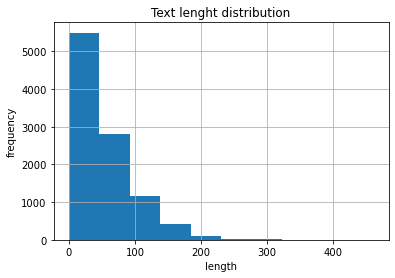

In [11]:
import matplotlib.pyplot as plt
df.text.apply(len).hist()
plt.title('Text lenght distribution')
plt.xlabel('length')
plt.ylabel('frequency')

Text(0.5, 0.98, 'Target density distribution')

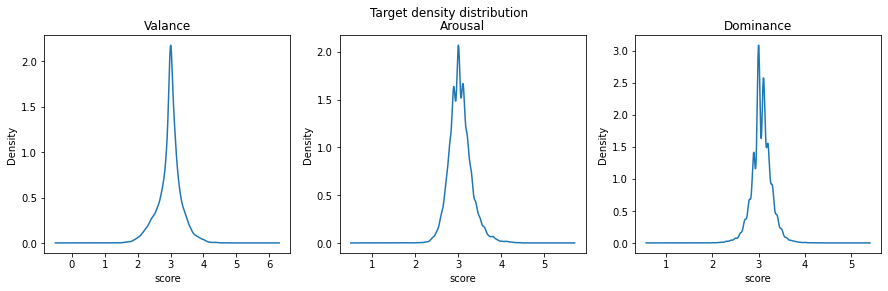

In [32]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=[15, 4])
df.V.plot.density(ax=ax1)
df.A.plot.density(ax=ax2)
df.D.plot.density(ax=ax3)
ax1.set_xlabel('score')
ax1.set_title('Valance')
ax2.set_xlabel('score')
ax2.set_title('Arousal')
ax3.set_xlabel('score')
ax3.set_title('Dominance')
fig.suptitle('Target density distribution')

In [4]:
db = DistillBert()

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertModel: ['vocab_transform.weight', 'vocab_projector.weight', 'vocab_layer_norm.bias', 'vocab_projector.bias', 'vocab_transform.bias', 'vocab_layer_norm.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [5]:
f = db.transform(df,  batch_size=512)

batch number 0 out of 19 done!
batch number 1 out of 19 done!
batch number 2 out of 19 done!
batch number 3 out of 19 done!
batch number 4 out of 19 done!
batch number 5 out of 19 done!
batch number 6 out of 19 done!
batch number 7 out of 19 done!
batch number 8 out of 19 done!
batch number 9 out of 19 done!
batch number 10 out of 19 done!
batch number 11 out of 19 done!
batch number 12 out of 19 done!
batch number 13 out of 19 done!
batch number 14 out of 19 done!
batch number 15 out of 19 done!
batch number 16 out of 19 done!
batch number 17 out of 19 done!
batch number 18 out of 19 done!
batch number 19 out of 19 done!


In [6]:
model_A = SentimentClassifier()
model_A.fit(f, df.A.values)
model_A.save(Path('boosters')/'A')

feature_fraction, val_score: inf:   0%|          | 0/7 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds
[100]	cv_agg's l2: 0.0586605 + 0.00549028


feature_fraction, val_score: 0.058326:  14%|#4        | 1/7 [00:04<00:26,  4.46s/it]

Early stopping, best iteration is:
[66]	cv_agg's l2: 0.0583258 + 0.0054019
[100]	cv_agg's l2: 0.0595625 + 0.00492091


feature_fraction, val_score: 0.058326:  29%|##8       | 2/7 [00:13<00:35,  7.11s/it]

Early stopping, best iteration is:
[66]	cv_agg's l2: 0.0583258 + 0.0054019
[100]	cv_agg's l2: 0.0590869 + 0.00553949


feature_fraction, val_score: 0.058326:  43%|####2     | 3/7 [00:21<00:30,  7.68s/it]

Early stopping, best iteration is:
[66]	cv_agg's l2: 0.0583258 + 0.0054019
[100]	cv_agg's l2: 0.0589858 + 0.00575234


feature_fraction, val_score: 0.058326:  57%|#####7    | 4/7 [00:29<00:22,  7.55s/it]

Early stopping, best iteration is:
[66]	cv_agg's l2: 0.0583258 + 0.0054019
[100]	cv_agg's l2: 0.0594114 + 0.00557699


feature_fraction, val_score: 0.058326:  71%|#######1  | 5/7 [00:35<00:14,  7.12s/it]

Early stopping, best iteration is:
[66]	cv_agg's l2: 0.0583258 + 0.0054019
[100]	cv_agg's l2: 0.0588428 + 0.00573237


feature_fraction, val_score: 0.058326:  86%|########5 | 6/7 [00:45<00:07,  7.97s/it]

Early stopping, best iteration is:
[66]	cv_agg's l2: 0.0583258 + 0.0054019
[100]	cv_agg's l2: 0.0587645 + 0.00572695


num_leaves, val_score: 0.058326:   0%|          | 0/20 [00:00<?, ?it/s]

Early stopping, best iteration is:
[66]	cv_agg's l2: 0.0583258 + 0.0054019
[100]	cv_agg's l2: 0.0607752 + 0.00573076


num_leaves, val_score: 0.058326:   5%|5         | 1/20 [00:25<07:58, 25.20s/it]

Early stopping, best iteration is:
[66]	cv_agg's l2: 0.0583258 + 0.0054019


num_leaves, val_score: 0.058326:   5%|5         | 1/20 [00:25<07:58, 25.20s/it]

[100]	cv_agg's l2: 0.0603124 + 0.00621841


num_leaves, val_score: 0.058326:  10%|#         | 2/20 [00:37<05:20, 17.80s/it]

Early stopping, best iteration is:
[66]	cv_agg's l2: 0.0583258 + 0.0054019
[100]	cv_agg's l2: 0.0592266 + 0.00574937


num_leaves, val_score: 0.058326:  15%|#5        | 3/20 [00:43<03:27, 12.23s/it]

Early stopping, best iteration is:
[66]	cv_agg's l2: 0.0583258 + 0.0054019
[100]	cv_agg's l2: 0.0602489 + 0.0060357


num_leaves, val_score: 0.058326:  20%|##        | 4/20 [01:00<03:41, 13.87s/it]

Early stopping, best iteration is:
[66]	cv_agg's l2: 0.0583258 + 0.0054019
[100]	cv_agg's l2: 0.0602815 + 0.00580232


num_leaves, val_score: 0.058326:  25%|##5       | 5/20 [01:18<03:52, 15.52s/it]

Early stopping, best iteration is:
[66]	cv_agg's l2: 0.0583258 + 0.0054019


num_leaves, val_score: 0.058326:  25%|##5       | 5/20 [01:18<03:52, 15.52s/it]

[100]	cv_agg's l2: 0.0604463 + 0.00583049


num_leaves, val_score: 0.058326:  30%|###       | 6/20 [01:38<03:57, 16.97s/it]

Early stopping, best iteration is:
[66]	cv_agg's l2: 0.0583258 + 0.0054019


num_leaves, val_score: 0.058326:  30%|###       | 6/20 [01:38<03:57, 16.97s/it]

[100]	cv_agg's l2: 0.0592049 + 0.00585817


num_leaves, val_score: 0.058326:  35%|###5      | 7/20 [01:44<02:54, 13.46s/it]

Early stopping, best iteration is:
[66]	cv_agg's l2: 0.0583258 + 0.0054019
[100]	cv_agg's l2: 0.0605467 + 0.00587853


num_leaves, val_score: 0.058326:  40%|####      | 8/20 [02:05<03:10, 15.89s/it]

Early stopping, best iteration is:
[66]	cv_agg's l2: 0.0583258 + 0.0054019


num_leaves, val_score: 0.058326:  40%|####      | 8/20 [02:05<03:10, 15.89s/it]

[100]	cv_agg's l2: 0.0602342 + 0.00597841


num_leaves, val_score: 0.058326:  45%|####5     | 9/20 [02:22<03:00, 16.41s/it]

Early stopping, best iteration is:
[66]	cv_agg's l2: 0.0583258 + 0.0054019


num_leaves, val_score: 0.058326:  45%|####5     | 9/20 [02:23<03:00, 16.41s/it]

[100]	cv_agg's l2: 0.0603788 + 0.00557829


num_leaves, val_score: 0.058326:  50%|#####     | 10/20 [02:37<02:37, 15.76s/it]

Early stopping, best iteration is:
[66]	cv_agg's l2: 0.0583258 + 0.0054019


num_leaves, val_score: 0.058326:  55%|#####5    | 11/20 [02:38<01:42, 11.36s/it]

[100]	cv_agg's l2: 0.0593353 + 0.00561765
Early stopping, best iteration is:
[66]	cv_agg's l2: 0.0583258 + 0.0054019
[100]	cv_agg's l2: 0.0586901 + 0.00582002


num_leaves, val_score: 0.058326:  60%|######    | 12/20 [02:43<01:14,  9.27s/it]

Early stopping, best iteration is:
[66]	cv_agg's l2: 0.0583258 + 0.0054019
[100]	cv_agg's l2: 0.0603214 + 0.00591484


num_leaves, val_score: 0.058326:  65%|######5   | 13/20 [02:52<01:04,  9.14s/it]

Early stopping, best iteration is:
[66]	cv_agg's l2: 0.0583258 + 0.0054019
[100]	cv_agg's l2: 0.0594083 + 0.00552156


num_leaves, val_score: 0.058326:  70%|#######   | 14/20 [02:59<00:51,  8.54s/it]

Early stopping, best iteration is:
[66]	cv_agg's l2: 0.0583258 + 0.0054019
[100]	cv_agg's l2: 0.0589582 + 0.00563474


num_leaves, val_score: 0.058326:  75%|#######5  | 15/20 [03:03<00:36,  7.32s/it]

Early stopping, best iteration is:
[66]	cv_agg's l2: 0.0583258 + 0.0054019


num_leaves, val_score: 0.058326:  80%|########  | 16/20 [03:05<00:22,  5.66s/it]

[100]	cv_agg's l2: 0.0586213 + 0.00563282
Early stopping, best iteration is:
[66]	cv_agg's l2: 0.0583258 + 0.0054019
[100]	cv_agg's l2: 0.0603124 + 0.00621841


num_leaves, val_score: 0.058326:  85%|########5 | 17/20 [03:18<00:23,  7.80s/it]

Early stopping, best iteration is:
[66]	cv_agg's l2: 0.0583258 + 0.0054019
[100]	cv_agg's l2: 0.059684 + 0.00558256


num_leaves, val_score: 0.058326:  90%|######### | 18/20 [03:25<00:15,  7.65s/it]

Early stopping, best iteration is:
[66]	cv_agg's l2: 0.0583258 + 0.0054019
[100]	cv_agg's l2: 0.0592452 + 0.00609195


num_leaves, val_score: 0.058326:  95%|#########5| 19/20 [03:30<00:06,  6.78s/it]

Early stopping, best iteration is:
[66]	cv_agg's l2: 0.0583258 + 0.0054019
[100]	cv_agg's l2: 0.0603214 + 0.00591484


bagging, val_score: 0.058326:   0%|          | 0/10 [00:00<?, ?it/s]

Early stopping, best iteration is:
[66]	cv_agg's l2: 0.0583258 + 0.0054019
[100]	cv_agg's l2: 0.0600418 + 0.00588595


bagging, val_score: 0.058326:  10%|#         | 1/10 [00:04<00:37,  4.11s/it]

Early stopping, best iteration is:
[66]	cv_agg's l2: 0.0583258 + 0.0054019
[100]	cv_agg's l2: 0.0610175 + 0.00551746


bagging, val_score: 0.058326:  20%|##        | 2/10 [00:08<00:33,  4.18s/it]

Early stopping, best iteration is:
[66]	cv_agg's l2: 0.0583258 + 0.0054019
[100]	cv_agg's l2: 0.0605275 + 0.00565256


bagging, val_score: 0.058326:  30%|###       | 3/10 [00:12<00:28,  4.14s/it]

Early stopping, best iteration is:
[66]	cv_agg's l2: 0.0583258 + 0.0054019
[100]	cv_agg's l2: 0.0603459 + 0.00519786


bagging, val_score: 0.058326:  40%|####      | 4/10 [00:16<00:24,  4.10s/it]

Early stopping, best iteration is:
[66]	cv_agg's l2: 0.0583258 + 0.0054019
[100]	cv_agg's l2: 0.059916 + 0.00553516


bagging, val_score: 0.058326:  50%|#####     | 5/10 [00:20<00:20,  4.13s/it]

Early stopping, best iteration is:
[66]	cv_agg's l2: 0.0583258 + 0.0054019
[100]	cv_agg's l2: 0.0619783 + 0.00493018


bagging, val_score: 0.058326:  60%|######    | 6/10 [00:24<00:16,  4.02s/it]

Early stopping, best iteration is:
[66]	cv_agg's l2: 0.0583258 + 0.0054019
[100]	cv_agg's l2: 0.0594792 + 0.00498951


bagging, val_score: 0.058326:  70%|#######   | 7/10 [00:28<00:12,  4.06s/it]

Early stopping, best iteration is:
[66]	cv_agg's l2: 0.0583258 + 0.0054019
[100]	cv_agg's l2: 0.0609778 + 0.00566313


bagging, val_score: 0.058326:  80%|########  | 8/10 [00:32<00:08,  4.15s/it]

Early stopping, best iteration is:
[66]	cv_agg's l2: 0.0583258 + 0.0054019
[100]	cv_agg's l2: 0.0599375 + 0.00574573


bagging, val_score: 0.058326:  90%|######### | 9/10 [00:37<00:04,  4.12s/it]

Early stopping, best iteration is:
[66]	cv_agg's l2: 0.0583258 + 0.0054019
[100]	cv_agg's l2: 0.059197 + 0.00551898


feature_fraction_stage2, val_score: 0.058326:   0%|          | 0/3 [00:00<?, ?it/s]

Early stopping, best iteration is:
[66]	cv_agg's l2: 0.0583258 + 0.0054019
[100]	cv_agg's l2: 0.0589595 + 0.00570884


feature_fraction_stage2, val_score: 0.058326:  33%|###3      | 1/3 [00:05<00:10,  5.41s/it]

Early stopping, best iteration is:
[66]	cv_agg's l2: 0.0583258 + 0.0054019
[100]	cv_agg's l2: 0.0591541 + 0.00600041


feature_fraction_stage2, val_score: 0.058326:  67%|######6   | 2/3 [00:10<00:05,  5.12s/it]

Early stopping, best iteration is:
[66]	cv_agg's l2: 0.0583258 + 0.0054019
[100]	cv_agg's l2: 0.0591692 + 0.00536394


regularization_factors, val_score: 0.058326:   0%|          | 0/20 [00:00<?, ?it/s]

Early stopping, best iteration is:
[66]	cv_agg's l2: 0.0583258 + 0.0054019
[100]	cv_agg's l2: 0.0588394 + 0.00540262


regularization_factors, val_score: 0.058326:   5%|5         | 1/20 [00:05<01:45,  5.57s/it]

Early stopping, best iteration is:
[66]	cv_agg's l2: 0.0583258 + 0.0054019
[100]	cv_agg's l2: 0.0582315 + 0.00563179


regularization_factors, val_score: 0.058125:  10%|#         | 2/20 [00:12<01:50,  6.12s/it]

Early stopping, best iteration is:
[87]	cv_agg's l2: 0.0581248 + 0.0055512
[100]	cv_agg's l2: 0.0586605 + 0.00549028


regularization_factors, val_score: 0.058125:  15%|#5        | 3/20 [00:18<01:43,  6.10s/it]

Early stopping, best iteration is:
[87]	cv_agg's l2: 0.0581248 + 0.0055512
[100]	cv_agg's l2: 0.0587713 + 0.00605851


regularization_factors, val_score: 0.058125:  20%|##        | 4/20 [00:24<01:37,  6.12s/it]

Early stopping, best iteration is:
[87]	cv_agg's l2: 0.0581248 + 0.0055512
[100]	cv_agg's l2: 0.0592534 + 0.0057684


regularization_factors, val_score: 0.058125:  25%|##5       | 5/20 [00:30<01:33,  6.21s/it]

Early stopping, best iteration is:
[87]	cv_agg's l2: 0.0581248 + 0.0055512
[100]	cv_agg's l2: 0.0581946 + 0.00588892


regularization_factors, val_score: 0.058125:  30%|###       | 6/20 [00:35<01:17,  5.56s/it]

Early stopping, best iteration is:
[87]	cv_agg's l2: 0.0581248 + 0.0055512
[100]	cv_agg's l2: 0.0591257 + 0.00559636


regularization_factors, val_score: 0.058125:  35%|###5      | 7/20 [00:41<01:15,  5.79s/it]

Early stopping, best iteration is:
[87]	cv_agg's l2: 0.0581248 + 0.0055512
[100]	cv_agg's l2: 0.0587404 + 0.00564964


regularization_factors, val_score: 0.058125:  40%|####      | 8/20 [00:48<01:14,  6.24s/it]

Early stopping, best iteration is:
[87]	cv_agg's l2: 0.0581248 + 0.0055512
[100]	cv_agg's l2: 0.0589686 + 0.00533769


regularization_factors, val_score: 0.058125:  45%|####5     | 9/20 [00:55<01:10,  6.44s/it]

Early stopping, best iteration is:
[87]	cv_agg's l2: 0.0581248 + 0.0055512
[100]	cv_agg's l2: 0.0588828 + 0.00566193


regularization_factors, val_score: 0.058125:  50%|#####     | 10/20 [01:02<01:06,  6.64s/it]

Early stopping, best iteration is:
[87]	cv_agg's l2: 0.0581248 + 0.0055512
[100]	cv_agg's l2: 0.0586605 + 0.00549028


regularization_factors, val_score: 0.058125:  55%|#####5    | 11/20 [01:09<00:59,  6.66s/it]

Early stopping, best iteration is:
[87]	cv_agg's l2: 0.0581248 + 0.0055512
[100]	cv_agg's l2: 0.0581591 + 0.00549823


regularization_factors, val_score: 0.058125:  60%|######    | 12/20 [01:13<00:48,  6.08s/it]

Early stopping, best iteration is:
[87]	cv_agg's l2: 0.0581248 + 0.0055512
[100]	cv_agg's l2: 0.0590961 + 0.00563475


regularization_factors, val_score: 0.058125:  65%|######5   | 13/20 [01:21<00:46,  6.60s/it]

Early stopping, best iteration is:
[87]	cv_agg's l2: 0.0581248 + 0.0055512
[100]	cv_agg's l2: 0.058785 + 0.00580994


regularization_factors, val_score: 0.058125:  70%|#######   | 14/20 [01:29<00:42,  7.00s/it]

Early stopping, best iteration is:
[87]	cv_agg's l2: 0.0581248 + 0.0055512
[100]	cv_agg's l2: 0.0588717 + 0.00573712


regularization_factors, val_score: 0.058125:  75%|#######5  | 15/20 [01:36<00:34,  6.83s/it]

Early stopping, best iteration is:
[87]	cv_agg's l2: 0.0581248 + 0.0055512
[100]	cv_agg's l2: 0.0586605 + 0.00549028


regularization_factors, val_score: 0.058125:  80%|########  | 16/20 [01:41<00:26,  6.54s/it]

Early stopping, best iteration is:
[87]	cv_agg's l2: 0.0581248 + 0.0055512
[100]	cv_agg's l2: 0.058927 + 0.00587421


regularization_factors, val_score: 0.058125:  85%|########5 | 17/20 [01:48<00:19,  6.60s/it]

Early stopping, best iteration is:
[87]	cv_agg's l2: 0.0581248 + 0.0055512
[100]	cv_agg's l2: 0.0586702 + 0.00565725


regularization_factors, val_score: 0.058125:  90%|######### | 18/20 [01:54<00:13,  6.50s/it]

Early stopping, best iteration is:
[87]	cv_agg's l2: 0.0581248 + 0.0055512
[100]	cv_agg's l2: 0.0582989 + 0.00567156


regularization_factors, val_score: 0.058125:  95%|#########5| 19/20 [01:59<00:05,  5.85s/it]

Early stopping, best iteration is:
[87]	cv_agg's l2: 0.0581248 + 0.0055512
[100]	cv_agg's l2: 0.0586605 + 0.00549028


min_data_in_leaf, val_score: 0.058125:   0%|          | 0/5 [00:00<?, ?it/s]

Early stopping, best iteration is:
[87]	cv_agg's l2: 0.0581248 + 0.0055512
[100]	cv_agg's l2: 0.0582997 + 0.00563165


min_data_in_leaf, val_score: 0.058110:  20%|##        | 1/5 [00:05<00:20,  5.16s/it]

Early stopping, best iteration is:
[67]	cv_agg's l2: 0.0581098 + 0.00560782
[100]	cv_agg's l2: 0.0586681 + 0.00552666


min_data_in_leaf, val_score: 0.058110:  40%|####      | 2/5 [00:10<00:15,  5.27s/it]

Early stopping, best iteration is:
[67]	cv_agg's l2: 0.0581098 + 0.00560782
[100]	cv_agg's l2: 0.0585985 + 0.00601875


min_data_in_leaf, val_score: 0.058110:  60%|######    | 3/5 [00:16<00:11,  5.66s/it]

Early stopping, best iteration is:
[67]	cv_agg's l2: 0.0581098 + 0.00560782
[100]	cv_agg's l2: 0.0588652 + 0.00567126


min_data_in_leaf, val_score: 0.058110:  80%|########  | 4/5 [00:21<00:05,  5.20s/it]

Early stopping, best iteration is:
[67]	cv_agg's l2: 0.0581098 + 0.00560782
[100]	cv_agg's l2: 0.0586281 + 0.00591667


min_data_in_leaf, val_score: 0.058110: 100%|##########| 5/5 [00:27<00:00,  5.43s/it]

Early stopping, best iteration is:
[67]	cv_agg's l2: 0.0581098 + 0.00560782
Best score: 0.05810976555097789
Best params: {'objective': 'regression', 'metric': 'l2', 'boosting_type': 'gbdt', 'verbosity': -1, 'feature_pre_filter': False, 'lambda_l1': 1.2945502180019053e-07, 'lambda_l2': 8.665249244045263, 'num_leaves': 31, 'feature_fraction': 0.4, 'bagging_fraction': 1.0, 'bagging_freq': 0, 'min_child_samples': 50}
  Params: 
    objective: regression
    metric: l2
    boosting_type: gbdt
    verbosity: -1
    feature_pre_filter: False
    lambda_l1: 1.2945502180019053e-07
    lambda_l2: 8.665249244045263
    num_leaves: 31
    feature_fraction: 0.4
    bagging_fraction: 1.0
    bagging_freq: 0
    min_child_samples: 50
saving model


In [7]:
model_V = SentimentClassifier()
model_V.fit(f, df.V.values)
model_V.save(Path('boosters')/'V')

feature_fraction, val_score: inf:   0%|          | 0/7 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds
[100]	cv_agg's l2: 0.0833868 + 0.0123823


feature_fraction, val_score: 0.083288:  14%|#4        | 1/7 [00:09<00:55,  9.20s/it]

Early stopping, best iteration is:
[75]	cv_agg's l2: 0.083288 + 0.0126145
[100]	cv_agg's l2: 0.0837071 + 0.0123306


feature_fraction, val_score: 0.083288:  29%|##8       | 2/7 [00:14<00:34,  6.90s/it]

Early stopping, best iteration is:
[75]	cv_agg's l2: 0.083288 + 0.0126145
[100]	cv_agg's l2: 0.0834609 + 0.0123804


feature_fraction, val_score: 0.083288:  43%|####2     | 3/7 [00:25<00:34,  8.57s/it]

Early stopping, best iteration is:
[75]	cv_agg's l2: 0.083288 + 0.0126145
[100]	cv_agg's l2: 0.0826507 + 0.0118436


feature_fraction, val_score: 0.082582:  57%|#####7    | 4/7 [00:33<00:25,  8.36s/it]

Early stopping, best iteration is:
[90]	cv_agg's l2: 0.0825821 + 0.0118707
[100]	cv_agg's l2: 0.0828945 + 0.011933


feature_fraction, val_score: 0.082582:  71%|#######1  | 5/7 [00:41<00:16,  8.42s/it]

Early stopping, best iteration is:
[90]	cv_agg's l2: 0.0825821 + 0.0118707
[100]	cv_agg's l2: 0.0825815 + 0.0122968


feature_fraction, val_score: 0.082494:  86%|########5 | 6/7 [00:49<00:08,  8.19s/it]

Early stopping, best iteration is:
[91]	cv_agg's l2: 0.0824941 + 0.0121313
[100]	cv_agg's l2: 0.0827188 + 0.0119105


num_leaves, val_score: 0.082494:   0%|          | 0/20 [00:00<?, ?it/s]

Early stopping, best iteration is:
[91]	cv_agg's l2: 0.0824941 + 0.0121313
[100]	cv_agg's l2: 0.0842472 + 0.0125226


num_leaves, val_score: 0.082494:   5%|5         | 1/20 [00:21<06:45, 21.32s/it]

Early stopping, best iteration is:
[91]	cv_agg's l2: 0.0824941 + 0.0121313


num_leaves, val_score: 0.082494:   5%|5         | 1/20 [00:21<06:45, 21.32s/it]

[100]	cv_agg's l2: 0.0851146 + 0.0127639


num_leaves, val_score: 0.082494:  10%|#         | 2/20 [00:45<06:53, 22.98s/it]

Early stopping, best iteration is:
[91]	cv_agg's l2: 0.0824941 + 0.0121313


num_leaves, val_score: 0.082494:  10%|#         | 2/20 [00:45<06:53, 22.98s/it]

[100]	cv_agg's l2: 0.0853107 + 0.0123597


num_leaves, val_score: 0.082494:  15%|#5        | 3/20 [01:08<06:33, 23.15s/it]

Early stopping, best iteration is:
[91]	cv_agg's l2: 0.0824941 + 0.0121313


num_leaves, val_score: 0.082494:  15%|#5        | 3/20 [01:09<06:33, 23.15s/it]

[100]	cv_agg's l2: 0.0820622 + 0.0121809


num_leaves, val_score: 0.082027:  20%|##        | 4/20 [01:16<04:32, 17.05s/it]

Early stopping, best iteration is:
[89]	cv_agg's l2: 0.0820271 + 0.0122685
[100]	cv_agg's l2: 0.0847264 + 0.0122515


num_leaves, val_score: 0.082027:  25%|##5       | 5/20 [01:36<04:30, 18.02s/it]

Early stopping, best iteration is:
[89]	cv_agg's l2: 0.0820271 + 0.0122685
[100]	cv_agg's l2: 0.0839602 + 0.0125673


num_leaves, val_score: 0.082027:  30%|###       | 6/20 [01:54<04:12, 18.01s/it]

Early stopping, best iteration is:
[89]	cv_agg's l2: 0.0820271 + 0.0122685
[100]	cv_agg's l2: 0.083985 + 0.0121412


num_leaves, val_score: 0.082027:  35%|###5      | 7/20 [02:12<03:56, 18.18s/it]

Early stopping, best iteration is:
[89]	cv_agg's l2: 0.0820271 + 0.0122685
[100]	cv_agg's l2: 0.0844824 + 0.0126655


num_leaves, val_score: 0.082027:  40%|####      | 8/20 [02:42<04:21, 21.82s/it]

Early stopping, best iteration is:
[89]	cv_agg's l2: 0.0820271 + 0.0122685


num_leaves, val_score: 0.082027:  40%|####      | 8/20 [02:42<04:21, 21.82s/it]

[100]	cv_agg's l2: 0.0847409 + 0.01296


num_leaves, val_score: 0.082027:  45%|####5     | 9/20 [03:00<03:46, 20.59s/it]

Early stopping, best iteration is:
[89]	cv_agg's l2: 0.0820271 + 0.0122685
[100]	cv_agg's l2: 0.0846541 + 0.0120733


num_leaves, val_score: 0.082027:  50%|#####     | 10/20 [03:24<03:37, 21.77s/it]

Early stopping, best iteration is:
[89]	cv_agg's l2: 0.0820271 + 0.0122685


num_leaves, val_score: 0.082027:  50%|#####     | 10/20 [03:24<03:37, 21.77s/it]

[100]	cv_agg's l2: 0.0843516 + 0.0126504


num_leaves, val_score: 0.082027:  55%|#####5    | 11/20 [03:27<02:23, 15.89s/it]

Early stopping, best iteration is:
[89]	cv_agg's l2: 0.0820271 + 0.0122685
[100]	cv_agg's l2: 0.0831914 + 0.0122264


num_leaves, val_score: 0.082027:  60%|######    | 12/20 [03:35<01:48, 13.59s/it]

Early stopping, best iteration is:
[89]	cv_agg's l2: 0.0820271 + 0.0122685
[100]	cv_agg's l2: 0.0826901 + 0.0130162


num_leaves, val_score: 0.082027:  65%|######5   | 13/20 [03:41<01:18, 11.23s/it]

Early stopping, best iteration is:
[89]	cv_agg's l2: 0.0820271 + 0.0122685
[100]	cv_agg's l2: 0.0831451 + 0.0118304


num_leaves, val_score: 0.082027:  70%|#######   | 14/20 [03:51<01:05, 10.98s/it]

Early stopping, best iteration is:
[89]	cv_agg's l2: 0.0820271 + 0.0122685
[100]	cv_agg's l2: 0.083303 + 0.0116393


num_leaves, val_score: 0.082027:  75%|#######5  | 15/20 [04:02<00:54, 10.84s/it]

Early stopping, best iteration is:
[89]	cv_agg's l2: 0.0820271 + 0.0122685
[100]	cv_agg's l2: 0.0839538 + 0.0126689


num_leaves, val_score: 0.082027:  80%|########  | 16/20 [04:04<00:33,  8.32s/it]

Early stopping, best iteration is:
[89]	cv_agg's l2: 0.0820271 + 0.0122685
[100]	cv_agg's l2: 0.0837475 + 0.0112295


num_leaves, val_score: 0.082027:  85%|########5 | 17/20 [04:18<00:30, 10.02s/it]

Early stopping, best iteration is:
[89]	cv_agg's l2: 0.0820271 + 0.0122685
[100]	cv_agg's l2: 0.0825772 + 0.0117289


num_leaves, val_score: 0.082027:  90%|######### | 18/20 [04:25<00:17,  8.99s/it]

Early stopping, best iteration is:
[89]	cv_agg's l2: 0.0820271 + 0.0122685
[100]	cv_agg's l2: 0.0839758 + 0.0122425


num_leaves, val_score: 0.082027:  95%|#########5| 19/20 [04:40<00:10, 10.78s/it]

Early stopping, best iteration is:
[89]	cv_agg's l2: 0.0820271 + 0.0122685
[100]	cv_agg's l2: 0.0832638 + 0.0120811


num_leaves, val_score: 0.082027: 100%|##########| 20/20 [04:59<00:00, 14.98s/it]

Early stopping, best iteration is:
[89]	cv_agg's l2: 0.0820271 + 0.0122685



bagging, val_score: 0.082027:   0%|          | 0/10 [00:00<?, ?it/s]

[100]	cv_agg's l2: 0.0859858 + 0.0115822


bagging, val_score: 0.082027:  10%|#         | 1/10 [00:07<01:09,  7.76s/it]

Early stopping, best iteration is:
[89]	cv_agg's l2: 0.0820271 + 0.0122685
[100]	cv_agg's l2: 0.0828751 + 0.0118242


bagging, val_score: 0.082027:  20%|##        | 2/10 [00:15<01:03,  7.95s/it]

Early stopping, best iteration is:
[89]	cv_agg's l2: 0.0820271 + 0.0122685
[100]	cv_agg's l2: 0.0863117 + 0.0115363


bagging, val_score: 0.082027:  30%|###       | 3/10 [00:23<00:54,  7.74s/it]

Early stopping, best iteration is:
[89]	cv_agg's l2: 0.0820271 + 0.0122685
[100]	cv_agg's l2: 0.0834834 + 0.012365


bagging, val_score: 0.082027:  40%|####      | 4/10 [00:31<00:46,  7.78s/it]

Early stopping, best iteration is:
[89]	cv_agg's l2: 0.0820271 + 0.0122685
[100]	cv_agg's l2: 0.0867553 + 0.0121118


bagging, val_score: 0.082027:  50%|#####     | 5/10 [00:38<00:37,  7.44s/it]

Early stopping, best iteration is:
[89]	cv_agg's l2: 0.0820271 + 0.0122685
[100]	cv_agg's l2: 0.0845771 + 0.0108448


bagging, val_score: 0.082027:  60%|######    | 6/10 [00:45<00:30,  7.59s/it]

Early stopping, best iteration is:
[89]	cv_agg's l2: 0.0820271 + 0.0122685
[100]	cv_agg's l2: 0.0844991 + 0.01161


bagging, val_score: 0.082027:  70%|#######   | 7/10 [00:53<00:22,  7.64s/it]

Early stopping, best iteration is:
[89]	cv_agg's l2: 0.0820271 + 0.0122685
[100]	cv_agg's l2: 0.0840188 + 0.0126006


bagging, val_score: 0.082027:  80%|########  | 8/10 [01:00<00:14,  7.43s/it]

Early stopping, best iteration is:
[89]	cv_agg's l2: 0.0820271 + 0.0122685
[100]	cv_agg's l2: 0.0827992 + 0.0115501


bagging, val_score: 0.082027:  90%|######### | 9/10 [01:08<00:07,  7.63s/it]

Early stopping, best iteration is:
[89]	cv_agg's l2: 0.0820271 + 0.0122685
[100]	cv_agg's l2: 0.084985 + 0.0121062


feature_fraction_stage2, val_score: 0.082027:   0%|          | 0/6 [00:00<?, ?it/s]

Early stopping, best iteration is:
[89]	cv_agg's l2: 0.0820271 + 0.0122685
[100]	cv_agg's l2: 0.083006 + 0.0126847


feature_fraction_stage2, val_score: 0.082027:  17%|#6        | 1/6 [00:08<00:39,  7.96s/it]

Early stopping, best iteration is:
[89]	cv_agg's l2: 0.0820271 + 0.0122685
[100]	cv_agg's l2: 0.0834867 + 0.0125753


feature_fraction_stage2, val_score: 0.082027:  33%|###3      | 2/6 [00:15<00:31,  7.93s/it]

Early stopping, best iteration is:
[89]	cv_agg's l2: 0.0820271 + 0.0122685
[100]	cv_agg's l2: 0.0833954 + 0.0123155


feature_fraction_stage2, val_score: 0.082027:  50%|#####     | 3/6 [00:24<00:24,  8.12s/it]

Early stopping, best iteration is:
[89]	cv_agg's l2: 0.0820271 + 0.0122685
[100]	cv_agg's l2: 0.0824385 + 0.0125827


feature_fraction_stage2, val_score: 0.082027:  67%|######6   | 4/6 [00:33<00:16,  8.40s/it]

Early stopping, best iteration is:
[89]	cv_agg's l2: 0.0820271 + 0.0122685
[100]	cv_agg's l2: 0.082944 + 0.0123316


feature_fraction_stage2, val_score: 0.082027:  83%|########3 | 5/6 [00:40<00:07,  8.00s/it]

Early stopping, best iteration is:
[89]	cv_agg's l2: 0.0820271 + 0.0122685
[100]	cv_agg's l2: 0.0827581 + 0.0127233


regularization_factors, val_score: 0.082027:   0%|          | 0/20 [00:00<?, ?it/s]

Early stopping, best iteration is:
[89]	cv_agg's l2: 0.0820271 + 0.0122685
[100]	cv_agg's l2: 0.0832527 + 0.0119731


regularization_factors, val_score: 0.082027:   5%|5         | 1/20 [00:09<03:08,  9.92s/it]

Early stopping, best iteration is:
[89]	cv_agg's l2: 0.0820271 + 0.0122685
[100]	cv_agg's l2: 0.0825459 + 0.0125628


regularization_factors, val_score: 0.082027:  10%|#         | 2/20 [00:18<02:46,  9.23s/it]

Early stopping, best iteration is:
[89]	cv_agg's l2: 0.0820271 + 0.0122685
[100]	cv_agg's l2: 0.0820622 + 0.0121809


regularization_factors, val_score: 0.082027:  15%|#5        | 3/20 [00:28<02:40,  9.44s/it]

Early stopping, best iteration is:
[89]	cv_agg's l2: 0.0820271 + 0.0122685
[100]	cv_agg's l2: 0.0824723 + 0.0124926


regularization_factors, val_score: 0.082027:  20%|##        | 4/20 [00:37<02:31,  9.47s/it]

Early stopping, best iteration is:
[89]	cv_agg's l2: 0.0820271 + 0.0122685
[100]	cv_agg's l2: 0.0828156 + 0.0121917


regularization_factors, val_score: 0.082027:  25%|##5       | 5/20 [00:47<02:22,  9.52s/it]

Early stopping, best iteration is:
[89]	cv_agg's l2: 0.0820271 + 0.0122685
[100]	cv_agg's l2: 0.0821738 + 0.0123272


regularization_factors, val_score: 0.082027:  30%|###       | 6/20 [00:57<02:14,  9.59s/it]

Early stopping, best iteration is:
[89]	cv_agg's l2: 0.0820271 + 0.0122685
[100]	cv_agg's l2: 0.0823169 + 0.0122654


regularization_factors, val_score: 0.082027:  35%|###5      | 7/20 [01:08<02:09,  9.96s/it]

Early stopping, best iteration is:
[89]	cv_agg's l2: 0.0820271 + 0.0122685
[100]	cv_agg's l2: 0.081964 + 0.0126155


regularization_factors, val_score: 0.081624:  40%|####      | 8/20 [01:16<01:55,  9.58s/it]

Early stopping, best iteration is:
[77]	cv_agg's l2: 0.0816238 + 0.0128381
[100]	cv_agg's l2: 0.0828057 + 0.012487


regularization_factors, val_score: 0.081624:  45%|####5     | 9/20 [01:24<01:40,  9.14s/it]

Early stopping, best iteration is:
[77]	cv_agg's l2: 0.0816238 + 0.0128381
[100]	cv_agg's l2: 0.0829561 + 0.0125678


regularization_factors, val_score: 0.081624:  50%|#####     | 10/20 [01:33<01:30,  9.08s/it]

Early stopping, best iteration is:
[77]	cv_agg's l2: 0.0816238 + 0.0128381
[100]	cv_agg's l2: 0.0820646 + 0.012909


regularization_factors, val_score: 0.081624:  55%|#####5    | 11/20 [01:42<01:20,  8.94s/it]

Early stopping, best iteration is:
[77]	cv_agg's l2: 0.0816238 + 0.0128381
[100]	cv_agg's l2: 0.0820622 + 0.0121809


regularization_factors, val_score: 0.081624:  60%|######    | 12/20 [01:51<01:10,  8.84s/it]

Early stopping, best iteration is:
[77]	cv_agg's l2: 0.0816238 + 0.0128381
[100]	cv_agg's l2: 0.0820622 + 0.0121809


regularization_factors, val_score: 0.081624:  65%|######5   | 13/20 [01:59<01:01,  8.76s/it]

Early stopping, best iteration is:
[77]	cv_agg's l2: 0.0816238 + 0.0128381
[100]	cv_agg's l2: 0.0819625 + 0.0121282


regularization_factors, val_score: 0.081624:  70%|#######   | 14/20 [02:08<00:52,  8.75s/it]

Early stopping, best iteration is:
[77]	cv_agg's l2: 0.0816238 + 0.0128381
[100]	cv_agg's l2: 0.0818604 + 0.0126409


regularization_factors, val_score: 0.081624:  75%|#######5  | 15/20 [02:17<00:44,  8.98s/it]

Early stopping, best iteration is:
[77]	cv_agg's l2: 0.0816238 + 0.0128381
[100]	cv_agg's l2: 0.0820622 + 0.0121809


regularization_factors, val_score: 0.081624:  80%|########  | 16/20 [02:26<00:35,  8.84s/it]

Early stopping, best iteration is:
[77]	cv_agg's l2: 0.0816238 + 0.0128381
[100]	cv_agg's l2: 0.0820622 + 0.0121809


regularization_factors, val_score: 0.081624:  85%|########5 | 17/20 [02:35<00:26,  8.78s/it]

Early stopping, best iteration is:
[77]	cv_agg's l2: 0.0816238 + 0.0128381
[100]	cv_agg's l2: 0.0821975 + 0.0120935


regularization_factors, val_score: 0.081624:  90%|######### | 18/20 [02:43<00:17,  8.64s/it]

Early stopping, best iteration is:
[77]	cv_agg's l2: 0.0816238 + 0.0128381
[100]	cv_agg's l2: 0.0822989 + 0.0118627


regularization_factors, val_score: 0.081624:  95%|#########5| 19/20 [02:52<00:08,  8.73s/it]

Early stopping, best iteration is:
[77]	cv_agg's l2: 0.0816238 + 0.0128381
[100]	cv_agg's l2: 0.0821687 + 0.0127234


min_data_in_leaf, val_score: 0.081624:   0%|          | 0/5 [00:00<?, ?it/s]

Early stopping, best iteration is:
[77]	cv_agg's l2: 0.0816238 + 0.0128381
[100]	cv_agg's l2: 0.0829402 + 0.0123082


min_data_in_leaf, val_score: 0.081624:  20%|##        | 1/5 [00:08<00:33,  8.35s/it]

Early stopping, best iteration is:
[77]	cv_agg's l2: 0.0816238 + 0.0128381
[100]	cv_agg's l2: 0.0825607 + 0.0125095


min_data_in_leaf, val_score: 0.081624:  40%|####      | 2/5 [00:18<00:28,  9.61s/it]

Early stopping, best iteration is:
[77]	cv_agg's l2: 0.0816238 + 0.0128381
[100]	cv_agg's l2: 0.0824954 + 0.0118126


min_data_in_leaf, val_score: 0.081624:  60%|######    | 3/5 [00:28<00:19,  9.65s/it]

Early stopping, best iteration is:
[77]	cv_agg's l2: 0.0816238 + 0.0128381
[100]	cv_agg's l2: 0.0824993 + 0.0123455


min_data_in_leaf, val_score: 0.081624:  80%|########  | 4/5 [00:37<00:09,  9.20s/it]

Early stopping, best iteration is:
[77]	cv_agg's l2: 0.0816238 + 0.0128381
[100]	cv_agg's l2: 0.0824075 + 0.0119795


min_data_in_leaf, val_score: 0.081624: 100%|##########| 5/5 [00:44<00:00,  8.82s/it]

Early stopping, best iteration is:
[77]	cv_agg's l2: 0.0816238 + 0.0128381
Best score: 0.08162384115307154
Best params: {'objective': 'regression', 'metric': 'l2', 'boosting_type': 'gbdt', 'verbosity': -1, 'feature_pre_filter': False, 'lambda_l1': 6.385498255775569e-05, 'lambda_l2': 3.533505266797999, 'num_leaves': 41, 'feature_fraction': 0.5, 'bagging_fraction': 1.0, 'bagging_freq': 0, 'min_child_samples': 20}
  Params: 
    objective: regression
    metric: l2
    boosting_type: gbdt
    verbosity: -1
    feature_pre_filter: False
    lambda_l1: 6.385498255775569e-05
    lambda_l2: 3.533505266797999
    num_leaves: 41
    feature_fraction: 0.5
    bagging_fraction: 1.0
    bagging_freq: 0
    min_child_samples: 20
saving model


In [8]:
model_D = SentimentClassifier()
model_D.fit(f, df.D.values)
model_D.save(Path('boosters')/'D')

feature_fraction, val_score: inf:   0%|          | 0/7 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.041787:  14%|#4        | 1/7 [00:06<00:36,  6.14s/it]

Early stopping, best iteration is:
[26]	cv_agg's l2: 0.0417865 + 0.00671767


feature_fraction, val_score: 0.041787:  29%|##8       | 2/7 [00:11<00:29,  5.80s/it]

Early stopping, best iteration is:
[26]	cv_agg's l2: 0.0417865 + 0.00671767


feature_fraction, val_score: 0.041772:  43%|####2     | 3/7 [00:15<00:19,  4.98s/it]

Early stopping, best iteration is:
[34]	cv_agg's l2: 0.0417725 + 0.00624023


feature_fraction, val_score: 0.041772:  57%|#####7    | 4/7 [00:22<00:17,  5.72s/it]

Early stopping, best iteration is:
[34]	cv_agg's l2: 0.0417725 + 0.00624023


feature_fraction, val_score: 0.041772:  71%|#######1  | 5/7 [00:26<00:09,  4.90s/it]

Early stopping, best iteration is:
[34]	cv_agg's l2: 0.0417725 + 0.00624023


feature_fraction, val_score: 0.041627:  86%|########5 | 6/7 [00:30<00:04,  4.85s/it]

Early stopping, best iteration is:
[33]	cv_agg's l2: 0.0416272 + 0.00638825


num_leaves, val_score: 0.041627:   0%|          | 0/20 [00:00<?, ?it/s]

Early stopping, best iteration is:
[33]	cv_agg's l2: 0.0416272 + 0.00638825


num_leaves, val_score: 0.041627:   5%|5         | 1/20 [00:22<07:12, 22.77s/it]

Early stopping, best iteration is:
[33]	cv_agg's l2: 0.0416272 + 0.00638825


num_leaves, val_score: 0.041627:  10%|#         | 2/20 [00:34<04:56, 16.49s/it]

Early stopping, best iteration is:
[33]	cv_agg's l2: 0.0416272 + 0.00638825


num_leaves, val_score: 0.041627:  15%|#5        | 3/20 [00:49<04:23, 15.52s/it]

Early stopping, best iteration is:
[33]	cv_agg's l2: 0.0416272 + 0.00638825


num_leaves, val_score: 0.041627:  20%|##        | 4/20 [01:09<04:35, 17.25s/it]

Early stopping, best iteration is:
[33]	cv_agg's l2: 0.0416272 + 0.00638825


num_leaves, val_score: 0.041627:  25%|##5       | 5/20 [01:21<03:50, 15.36s/it]

Early stopping, best iteration is:
[33]	cv_agg's l2: 0.0416272 + 0.00638825


num_leaves, val_score: 0.041627:  30%|###       | 6/20 [01:36<03:35, 15.38s/it]

Early stopping, best iteration is:
[33]	cv_agg's l2: 0.0416272 + 0.00638825


num_leaves, val_score: 0.041627:  35%|###5      | 7/20 [01:55<03:35, 16.60s/it]

Early stopping, best iteration is:
[33]	cv_agg's l2: 0.0416272 + 0.00638825


num_leaves, val_score: 0.041627:  40%|####      | 8/20 [02:11<03:15, 16.29s/it]

Early stopping, best iteration is:
[33]	cv_agg's l2: 0.0416272 + 0.00638825


num_leaves, val_score: 0.041627:  45%|####5     | 9/20 [02:31<03:11, 17.38s/it]

Early stopping, best iteration is:
[33]	cv_agg's l2: 0.0416272 + 0.00638825


num_leaves, val_score: 0.041627:  50%|#####     | 10/20 [02:45<02:44, 16.46s/it]

Early stopping, best iteration is:
[33]	cv_agg's l2: 0.0416272 + 0.00638825


num_leaves, val_score: 0.041627:  55%|#####5    | 11/20 [02:49<01:52, 12.56s/it]

Early stopping, best iteration is:
[33]	cv_agg's l2: 0.0416272 + 0.00638825
[100]	cv_agg's l2: 0.0415619 + 0.00627773


num_leaves, val_score: 0.041507:  60%|######    | 12/20 [02:51<01:16,  9.52s/it]

Early stopping, best iteration is:
[79]	cv_agg's l2: 0.0415073 + 0.00630741
[100]	cv_agg's l2: 0.0416413 + 0.00626485


num_leaves, val_score: 0.041507:  65%|######5   | 13/20 [02:54<00:52,  7.43s/it]

Early stopping, best iteration is:
[79]	cv_agg's l2: 0.0415073 + 0.00630741
[100]	cv_agg's l2: 0.0415619 + 0.00627773


num_leaves, val_score: 0.041507:  70%|#######   | 14/20 [02:56<00:35,  5.94s/it]

Early stopping, best iteration is:
[79]	cv_agg's l2: 0.0415073 + 0.00630741
[100]	cv_agg's l2: 0.042903 + 0.00596717


num_leaves, val_score: 0.041507:  75%|#######5  | 15/20 [03:06<00:34,  6.94s/it]

Early stopping, best iteration is:
[79]	cv_agg's l2: 0.0415073 + 0.00630741
[100]	cv_agg's l2: 0.0429794 + 0.00631849


num_leaves, val_score: 0.041507:  80%|########  | 16/20 [03:16<00:32,  8.02s/it]

Early stopping, best iteration is:
[79]	cv_agg's l2: 0.0415073 + 0.00630741
[100]	cv_agg's l2: 0.0431063 + 0.00604919


num_leaves, val_score: 0.041507:  85%|########5 | 17/20 [03:26<00:25,  8.61s/it]

Early stopping, best iteration is:
[79]	cv_agg's l2: 0.0415073 + 0.00630741


num_leaves, val_score: 0.041507:  90%|######### | 18/20 [03:28<00:12,  6.44s/it]

[100]	cv_agg's l2: 0.0420548 + 0.00645266
Early stopping, best iteration is:
[79]	cv_agg's l2: 0.0415073 + 0.00630741
[100]	cv_agg's l2: 0.0431286 + 0.00622412


num_leaves, val_score: 0.041507:  95%|#########5| 19/20 [03:42<00:08,  8.82s/it]

Early stopping, best iteration is:
[79]	cv_agg's l2: 0.0415073 + 0.00630741
[100]	cv_agg's l2: 0.0423573 + 0.00617477


bagging, val_score: 0.041507:   0%|          | 0/10 [00:00<?, ?it/s]

Early stopping, best iteration is:
[79]	cv_agg's l2: 0.0415073 + 0.00630741
[100]	cv_agg's l2: 0.0416255 + 0.00632218


bagging, val_score: 0.041507:  10%|#         | 1/10 [00:02<00:24,  2.68s/it]

Early stopping, best iteration is:
[79]	cv_agg's l2: 0.0415073 + 0.00630741
[100]	cv_agg's l2: 0.0417422 + 0.00639618


bagging, val_score: 0.041507:  20%|##        | 2/10 [00:05<00:21,  2.68s/it]

Early stopping, best iteration is:
[79]	cv_agg's l2: 0.0415073 + 0.00630741
[100]	cv_agg's l2: 0.0416431 + 0.00617632


bagging, val_score: 0.041507:  30%|###       | 3/10 [00:08<00:18,  2.68s/it]

Early stopping, best iteration is:
[79]	cv_agg's l2: 0.0415073 + 0.00630741
[100]	cv_agg's l2: 0.041846 + 0.00620268


bagging, val_score: 0.041507:  40%|####      | 4/10 [00:10<00:15,  2.52s/it]

Early stopping, best iteration is:
[79]	cv_agg's l2: 0.0415073 + 0.00630741
[100]	cv_agg's l2: 0.0417255 + 0.00622298


bagging, val_score: 0.041507:  50%|#####     | 5/10 [00:13<00:13,  2.60s/it]

Early stopping, best iteration is:
[79]	cv_agg's l2: 0.0415073 + 0.00630741
[100]	cv_agg's l2: 0.0417697 + 0.00642059


bagging, val_score: 0.041507:  60%|######    | 6/10 [00:15<00:10,  2.68s/it]

Early stopping, best iteration is:
[79]	cv_agg's l2: 0.0415073 + 0.00630741
[100]	cv_agg's l2: 0.0416461 + 0.00616867


bagging, val_score: 0.041507:  70%|#######   | 7/10 [00:18<00:07,  2.62s/it]

Early stopping, best iteration is:
[79]	cv_agg's l2: 0.0415073 + 0.00630741
[100]	cv_agg's l2: 0.0416745 + 0.0064131


bagging, val_score: 0.041507:  80%|########  | 8/10 [00:20<00:05,  2.58s/it]

Early stopping, best iteration is:
[79]	cv_agg's l2: 0.0415073 + 0.00630741
[100]	cv_agg's l2: 0.0416923 + 0.00599136


bagging, val_score: 0.041485:  90%|######### | 9/10 [00:23<00:02,  2.51s/it]

Early stopping, best iteration is:
[71]	cv_agg's l2: 0.0414854 + 0.00616185
[100]	cv_agg's l2: 0.0418053 + 0.00613874


feature_fraction_stage2, val_score: 0.041485:   0%|          | 0/6 [00:00<?, ?it/s]

Early stopping, best iteration is:
[71]	cv_agg's l2: 0.0414854 + 0.00616185
[100]	cv_agg's l2: 0.0415499 + 0.00614658


feature_fraction_stage2, val_score: 0.041468:  17%|#6        | 1/6 [00:02<00:12,  2.54s/it]

Early stopping, best iteration is:
[81]	cv_agg's l2: 0.0414683 + 0.00621015
[100]	cv_agg's l2: 0.0416824 + 0.00614084


feature_fraction_stage2, val_score: 0.041468:  33%|###3      | 2/6 [00:04<00:09,  2.43s/it]

Early stopping, best iteration is:
[81]	cv_agg's l2: 0.0414683 + 0.00621015
[100]	cv_agg's l2: 0.0417436 + 0.00623898


feature_fraction_stage2, val_score: 0.041468:  50%|#####     | 3/6 [00:07<00:07,  2.48s/it]

Early stopping, best iteration is:
[81]	cv_agg's l2: 0.0414683 + 0.00621015
[100]	cv_agg's l2: 0.0418537 + 0.00601142


feature_fraction_stage2, val_score: 0.041468:  67%|######6   | 4/6 [00:10<00:05,  2.64s/it]

Early stopping, best iteration is:
[81]	cv_agg's l2: 0.0414683 + 0.00621015
[100]	cv_agg's l2: 0.0418662 + 0.0061528


feature_fraction_stage2, val_score: 0.041468:  83%|########3 | 5/6 [00:12<00:02,  2.56s/it]

Early stopping, best iteration is:
[81]	cv_agg's l2: 0.0414683 + 0.00621015
[100]	cv_agg's l2: 0.0415559 + 0.00622034


regularization_factors, val_score: 0.041397:   0%|          | 0/20 [00:00<?, ?it/s]

Early stopping, best iteration is:
[70]	cv_agg's l2: 0.0413968 + 0.00634108
[100]	cv_agg's l2: 0.0415486 + 0.0062189


regularization_factors, val_score: 0.041397:   5%|5         | 1/20 [00:02<00:51,  2.70s/it]

Early stopping, best iteration is:
[70]	cv_agg's l2: 0.0413968 + 0.00634108
[100]	cv_agg's l2: 0.0415559 + 0.00622034


regularization_factors, val_score: 0.041397:  10%|#         | 2/20 [00:05<00:48,  2.70s/it]

Early stopping, best iteration is:
[70]	cv_agg's l2: 0.0413968 + 0.00634108
[100]	cv_agg's l2: 0.0415532 + 0.00605553


regularization_factors, val_score: 0.041397:  15%|#5        | 3/20 [00:08<00:47,  2.80s/it]

Early stopping, best iteration is:
[70]	cv_agg's l2: 0.0413968 + 0.00634108
[100]	cv_agg's l2: 0.0415721 + 0.0062218


regularization_factors, val_score: 0.041397:  20%|##        | 4/20 [00:11<00:45,  2.81s/it]

Early stopping, best iteration is:
[70]	cv_agg's l2: 0.0413968 + 0.00634108
[100]	cv_agg's l2: 0.0413076 + 0.00609329


regularization_factors, val_score: 0.041281:  25%|##5       | 5/20 [00:15<00:48,  3.26s/it]

Early stopping, best iteration is:
[144]	cv_agg's l2: 0.0412814 + 0.0060519
[100]	cv_agg's l2: 0.041543 + 0.00608319


regularization_factors, val_score: 0.041281:  30%|###       | 6/20 [00:19<00:50,  3.60s/it]

Early stopping, best iteration is:
[144]	cv_agg's l2: 0.0412814 + 0.0060519
[100]	cv_agg's l2: 0.0415871 + 0.00627041


regularization_factors, val_score: 0.041281:  35%|###5      | 7/20 [00:24<00:52,  4.03s/it]

Early stopping, best iteration is:
[144]	cv_agg's l2: 0.0412814 + 0.0060519
[100]	cv_agg's l2: 0.0417153 + 0.006039


regularization_factors, val_score: 0.041281:  40%|####      | 8/20 [00:29<00:51,  4.30s/it]

Early stopping, best iteration is:
[144]	cv_agg's l2: 0.0412814 + 0.0060519
[100]	cv_agg's l2: 0.0415683 + 0.00627299


regularization_factors, val_score: 0.041281:  45%|####5     | 9/20 [00:33<00:47,  4.36s/it]

Early stopping, best iteration is:
[144]	cv_agg's l2: 0.0412814 + 0.0060519
[100]	cv_agg's l2: 0.0415485 + 0.0062189


regularization_factors, val_score: 0.041281:  50%|#####     | 10/20 [00:38<00:43,  4.33s/it]

Early stopping, best iteration is:
[144]	cv_agg's l2: 0.0412814 + 0.0060519
[100]	cv_agg's l2: 0.0414569 + 0.00633652


regularization_factors, val_score: 0.041281:  55%|#####5    | 11/20 [00:42<00:38,  4.28s/it]

Early stopping, best iteration is:
[144]	cv_agg's l2: 0.0412814 + 0.0060519
[100]	cv_agg's l2: 0.0412744 + 0.00631558


regularization_factors, val_score: 0.041217:  60%|######    | 12/20 [00:46<00:34,  4.28s/it]

Early stopping, best iteration is:
[124]	cv_agg's l2: 0.0412172 + 0.00625228
[100]	cv_agg's l2: 0.0413518 + 0.00628583


regularization_factors, val_score: 0.041217:  65%|######5   | 13/20 [00:50<00:28,  4.13s/it]

Early stopping, best iteration is:
[124]	cv_agg's l2: 0.0412172 + 0.00625228
[100]	cv_agg's l2: 0.0415559 + 0.00622034


regularization_factors, val_score: 0.041217:  70%|#######   | 14/20 [00:54<00:24,  4.05s/it]

Early stopping, best iteration is:
[124]	cv_agg's l2: 0.0412172 + 0.00625228
[100]	cv_agg's l2: 0.0415821 + 0.00611079


regularization_factors, val_score: 0.041217:  75%|#######5  | 15/20 [00:58<00:20,  4.05s/it]

Early stopping, best iteration is:
[124]	cv_agg's l2: 0.0412172 + 0.00625228
[100]	cv_agg's l2: 0.0414741 + 0.00610834


regularization_factors, val_score: 0.041217:  80%|########  | 16/20 [01:02<00:15,  3.99s/it]

Early stopping, best iteration is:
[124]	cv_agg's l2: 0.0412172 + 0.00625228
[100]	cv_agg's l2: 0.0417406 + 0.00607744


regularization_factors, val_score: 0.041217:  85%|########5 | 17/20 [01:05<00:11,  3.88s/it]

Early stopping, best iteration is:
[124]	cv_agg's l2: 0.0412172 + 0.00625228
[100]	cv_agg's l2: 0.0415249 + 0.00600003


regularization_factors, val_score: 0.041217:  90%|######### | 18/20 [01:09<00:07,  3.85s/it]

Early stopping, best iteration is:
[124]	cv_agg's l2: 0.0412172 + 0.00625228
[100]	cv_agg's l2: 0.0413939 + 0.00620603


regularization_factors, val_score: 0.041217:  95%|#########5| 19/20 [01:13<00:03,  3.90s/it]

Early stopping, best iteration is:
[124]	cv_agg's l2: 0.0412172 + 0.00625228
[100]	cv_agg's l2: 0.0416484 + 0.0061111


min_data_in_leaf, val_score: 0.041217:   0%|          | 0/5 [00:00<?, ?it/s]

Early stopping, best iteration is:
[124]	cv_agg's l2: 0.0412172 + 0.00625228
[100]	cv_agg's l2: 0.0412314 + 0.00633994


min_data_in_leaf, val_score: 0.041198:  20%|##        | 1/5 [00:02<00:10,  2.61s/it]

Early stopping, best iteration is:
[70]	cv_agg's l2: 0.0411983 + 0.00638189
[100]	cv_agg's l2: 0.0411808 + 0.00628585


min_data_in_leaf, val_score: 0.041171:  40%|####      | 2/5 [00:05<00:08,  2.80s/it]

Early stopping, best iteration is:
[102]	cv_agg's l2: 0.0411707 + 0.00624593
[100]	cv_agg's l2: 0.0412345 + 0.00632058


min_data_in_leaf, val_score: 0.041171:  60%|######    | 3/5 [00:08<00:06,  3.05s/it]

Early stopping, best iteration is:
[102]	cv_agg's l2: 0.0411707 + 0.00624593
[100]	cv_agg's l2: 0.0412124 + 0.0063382


min_data_in_leaf, val_score: 0.041171:  80%|########  | 4/5 [00:12<00:03,  3.25s/it]

Early stopping, best iteration is:
[102]	cv_agg's l2: 0.0411707 + 0.00624593
[100]	cv_agg's l2: 0.0412342 + 0.00636984


min_data_in_leaf, val_score: 0.041171: 100%|##########| 5/5 [00:16<00:00,  3.22s/it]

Early stopping, best iteration is:
[102]	cv_agg's l2: 0.0411707 + 0.00624593
Best score: 0.041170683760727175
Best params: {'objective': 'regression', 'metric': 'l2', 'boosting_type': 'gbdt', 'verbosity': -1, 'feature_pre_filter': False, 'lambda_l1': 6.141505863595467, 'lambda_l2': 0.02312962452946973, 'num_leaves': 8, 'feature_fraction': 0.6479999999999999, 'bagging_fraction': 0.6319269943247444, 'bagging_freq': 1, 'min_child_samples': 100}
  Params: 
    objective: regression
    metric: l2
    boosting_type: gbdt
    verbosity: -1
    feature_pre_filter: False
    lambda_l1: 6.141505863595467
    lambda_l2: 0.02312962452946973
    num_leaves: 8
    feature_fraction: 0.6479999999999999
    bagging_fraction: 0.6319269943247444
    bagging_freq: 1
    min_child_samples: 100
saving model
